Импортируем необходимые пакеты

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder

Считываем данные из GA Huts в датафрейм

In [2]:
df_hits = pd.read_csv('data\ga_hits.csv')
df_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


Удаляем не нужные столбцы из df_hits

In [3]:
df_hits = df_hits.drop(df_hits.columns[[1, 2, 3, 4, 5, 6, 7, 9, 10]], axis= 1)
df_hits.head(1)

,session_id,event_action
0,5639623078712724064.1640254056.1640254056,quiz_show


Создаем столбец с целевой переменной

In [4]:
df_hits['target'] = df_hits['event_action'].apply(lambda x: 1.0 if x in['sub_car_claim_click', 'sub_car_claim_submit_click',
'sub_open_dialog_click', 'sub_custom_question_submit_click',
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
'sub_car_request_submit_click']else 0.0)
df_hits.head(1)

,session_id,event_action,target
0,5639623078712724064.1640254056.1640254056,quiz_show,0.0


In [5]:
df_hits.shape

(15726470, 3)

In [6]:
df_hits2 = df_hits.drop('event_action', axis=1)

In [7]:
df_hits2 = df_hits2.groupby(['session_id', 'target'], as_index=False).max()
df_hits2.shape

(1784748, 2)

Считываем данные из GA Sessions в датафрейм

In [8]:
df_sessions = pd.read_csv('data\ga_sessions.csv', low_memory=False)
df_sessions.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [9]:
df_sessions.shape

(1860042, 18)

Объединяем датафреймы

In [10]:
df_merger = pd.merge(left=df_hits2, right=df_sessions, on='session_id', how='inner')
df_merger.head()

,session_id,target,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,1000009318903347362.1632663668.1632663668,0.0,232832813.1632663714,2021-09-26,16:00:00,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,PkybGvWbaqORmxjNunqZ,NaN,mobile,NaN,Samsung,NaN,412x869,Chrome,Russia,Gelendzhik
1,1000010177899156286.1635013443.1635013443,0.0,232833013.1635013438,2021-10-23,21:24:03,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,NaN,360x640,Samsung Internet,Russia,Voronezh
2,1000013386240115915.1635402956.1635402956,0.0,232833760.1635402955,2021-10-28,09:35:56,1,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,NaN,412x846,Chrome,Russia,Cherkessk
3,1000017303238376207.1623489300.1623489300,0.0,232834672.1623489295,2021-06-12,12:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Realme,NaN,360x780,Chrome,Russia,Irkutsk
4,1000020580299877109.1624943350.1624943350,0.0,232835435.1624943349,2021-06-29,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,414x736,Safari,Russia,Moscow


In [11]:
df_merger.shape

(1781974, 19)

Записываем итоговый датафрейм в файл csv

In [12]:
df_merger.to_csv('data\df_merger.csv', index=False)

## EDA

In [13]:
df = pd.read_csv('data\df_merger.csv')
df.head(1)

,session_id,target,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,1000009318903347362.1632663668.1632663668,0.0,2.328328e+08,2021-09-26,16:00:00,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,PkybGvWbaqORmxjNunqZ,NaN,mobile,NaN,Samsung,NaN,412x869,Chrome,Russia,Gelendzhik


In [14]:
df.shape

(1781974, 19)

In [17]:
for column in df.columns:
    val = df[column]
    quantity = len(val.unique())
    value_counts = val.value_counts(dropna=False)
    
    print(f'Характеристика: {column}')
    print(f'Количество уникальных значений: {quantity}')
    print(f'Список значений: \n{value_counts}')

Характеристика: session_id
Количество уникальных значений: 1732266
Список значений: 
session_id
1577781861592861659.1632373723.1632373723    2
2967957398276418301.1623337730.1623337730    2
4999755032729082170.1640618298.1640618298    2
8570716603548315066.1628057018.1628057018    2
7015751529717458122.1630954698.1630954867    2
                                            ..
3814178698486682932.1630082361.1630082361    1
3814178320533603170.1634124641.1634124641    1
3814172775724929829.1638973182.1638973182    1
3814170512273422927.1624713639.1624713639    1
999989480451054428.1634311006.1634311006     1
Name: count, Length: 1732266, dtype: int64
Характеристика: target
Количество уникальных значений: 2
Список значений: 
target
0.0    1731660
1.0      50314
Name: count, dtype: int64
Характеристика: client_id
Количество уникальных значений: 1320701
Список значений: 
client_id
1.750498e+09    642
7.368596e+08    315
1.266575e+09    305
1.894772e+09    271
1.065182e+09    258
            

In [18]:
df[df.duplicated()]

,session_id,target,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city


In [19]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781974 entries, 0 to 1781973
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   session_id                1781974 non-null  object 
 1   target                    1781974 non-null  float64
 2   client_id                 1781974 non-null  float64
 3   visit_date                1781974 non-null  object 
 4   visit_time                1781974 non-null  object 
 5   visit_number              1781974 non-null  int64  
 6   utm_source                1781893 non-null  object 
 7   utm_medium                1781974 non-null  object 
 8   utm_campaign              1579596 non-null  object 
 9   utm_adcontent             1469230 non-null  object 
 10  utm_keyword               727076 non-null   object 
 11  device_category           1781974 non-null  object 
 12  device_os                 734010 non-null   object 
 13  device_brand              1

<Axes: >

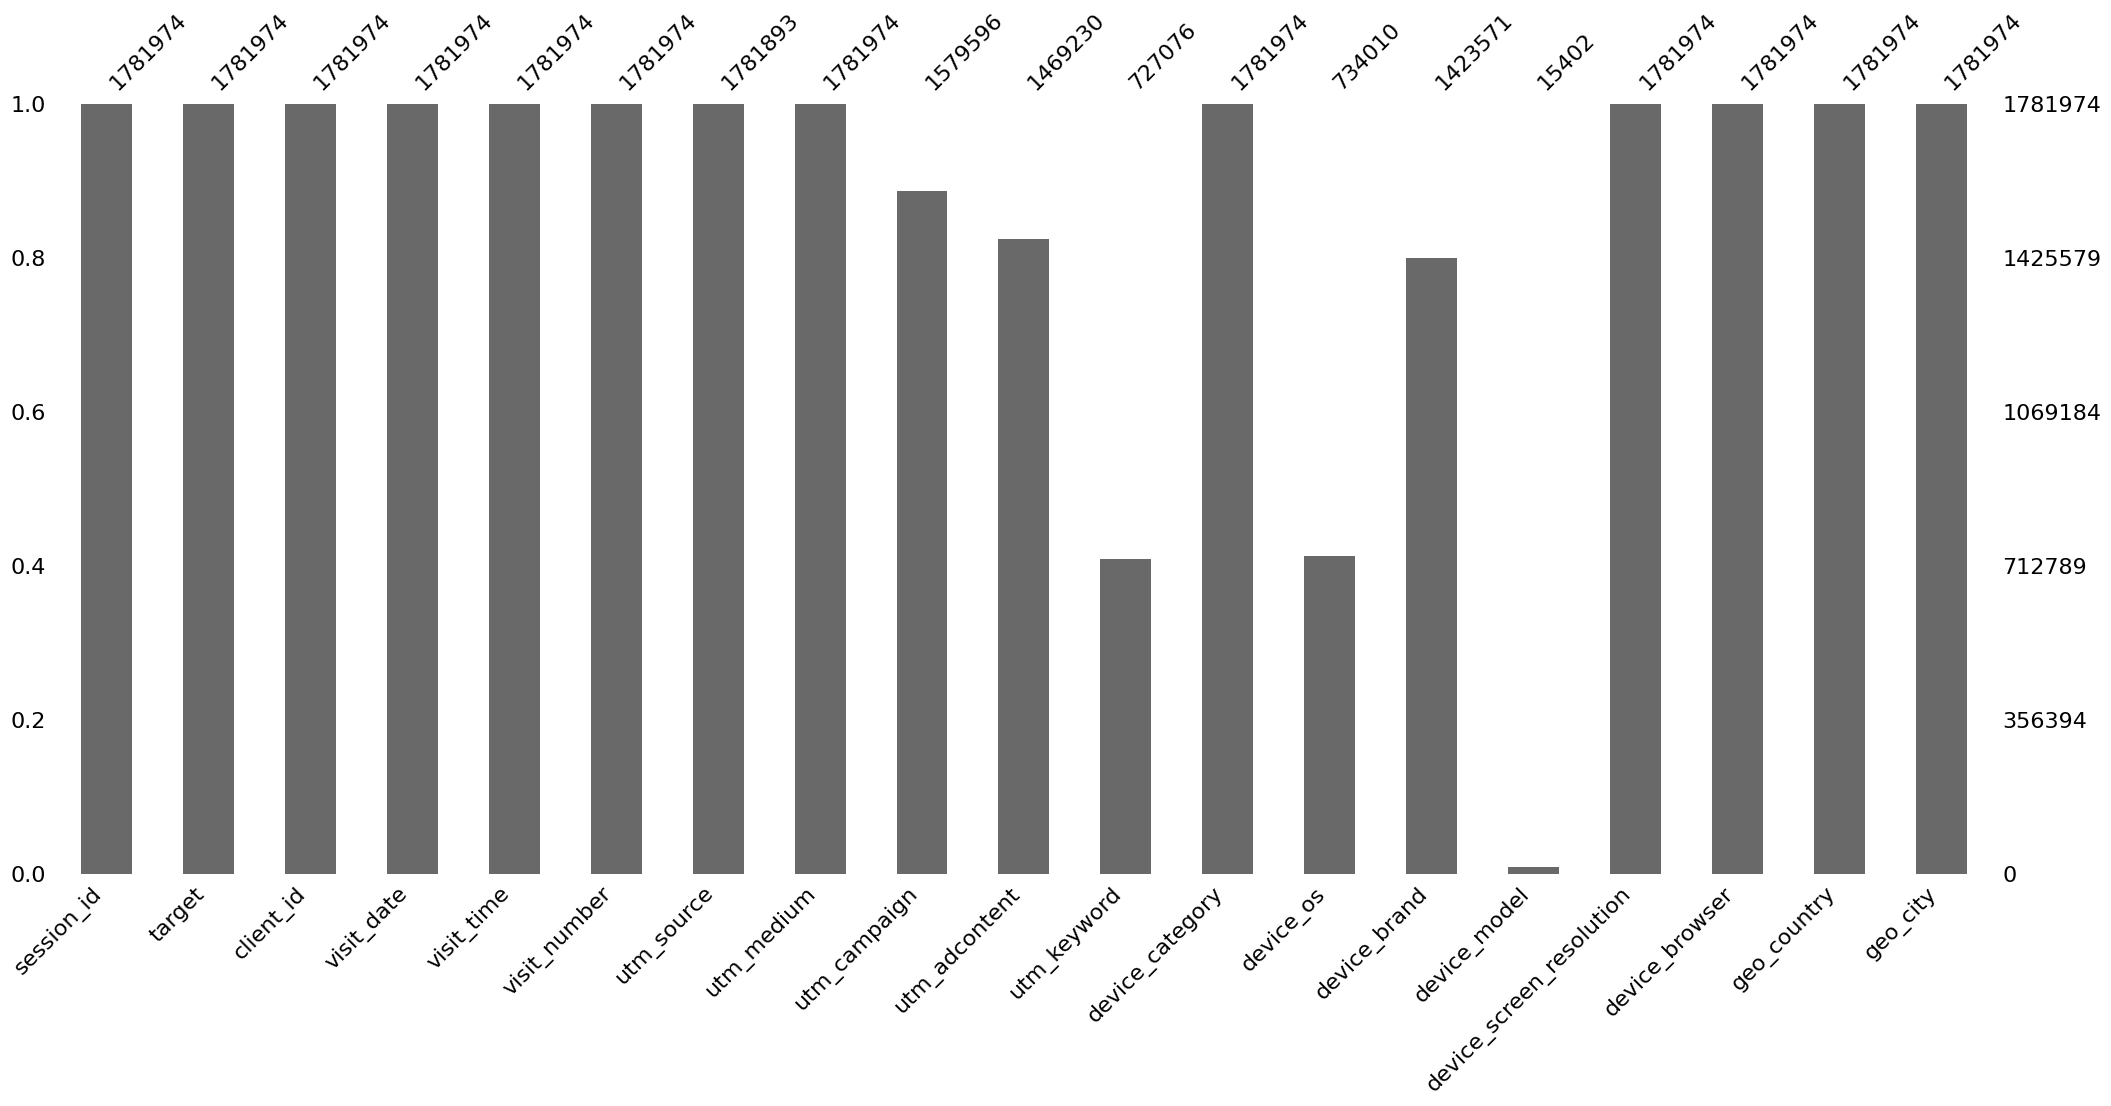

In [20]:
msno.bar(df)

Удаление пропущенных знчений будет в Pipline (PyCharm)

In [7]:
#Преобразуем дату посещения в дни недели, смотрим количество действий по дням недели.
#для просмотра действий по месяцам не хватает данных.
df1 = df.copy()
df1['date'] = pd.to_datetime(df1['visit_date'], utc=True)
df1['dayofweek'] = df1.date.dt.dayofweek
df1_target = df1[df1.target==1]   #только с целевыми действиями
stats_t = df1_target.groupby(['dayofweek'], as_index=False)[['target']].count()
stats_all = df1.groupby(['dayofweek'], as_index=False)[['target']].count()
stats = pd.merge(left=stats_all, right=stats_t, on='dayofweek', how='inner')
stats['target_x'] = stats['target_x'].apply(lambda x : np.log10(x))
stats['target_y'] = stats['target_y'].apply(lambda x : np.log10(x))
stats

,dayofweek,target_x,target_y
0,0,5.464087,3.976212
1,1,5.470644,3.938470
2,2,5.394651,3.861773
3,3,5.413900,3.859258
4,4,5.406573,3.816573
5,5,5.335849,3.746089
6,6,5.334653,3.743039


<Axes: xlabel='dayofweek'>

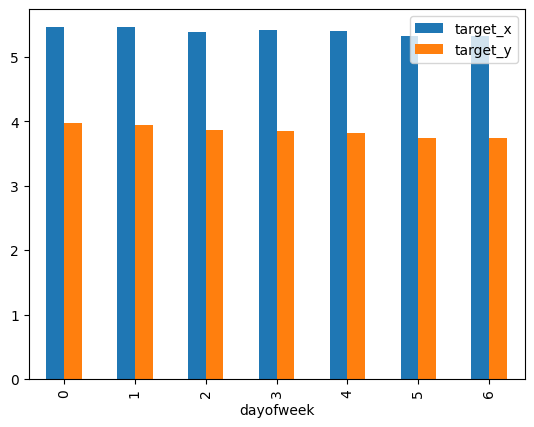

In [22]:
stats.plot(x='dayofweek', y=['target_x','target_y'], kind="bar")

In [8]:
#Если количество посещений сайта больше 12 - заменим на 12. 
df1.loc[df1['visit_number'] > 12, 'visit_number'] = 12
df1.visit_number.value_counts()

visit_number
1     1333425
2      219641
3       74779
12      43609
4       38378
5       22504
6       15279
7       10841
8        8099
9        6227
10       5060
11       4132
Name: count, dtype: int64

Колонки utm* и sity имеют высокую кардинальность (много уникальных значений), OneHotEncoder даст очень большую размерность,
нужно ее ограничить. Пропущенные значения заполнить most_frequent.

In [11]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown="infrequent_if_exist", min_frequency=0.0001)
ohe.fit(df1[['utm_source']])

OneHotEncoder(handle_unknown='infrequent_if_exist', min_frequency=0.0001,
              sparse_output=False)

In [12]:
ohe_m = ohe.transform(df[['utm_source']])
ohe_m.shape

(1781974, 55)

55 столбцов вместо 281. min_frequency уменьшает размерность и зашумление данных.

Категория устройства и разрешение экрана

In [30]:
# Получаем площадь экрана перемножением сторон.
df2 = df.copy()
df2['resolution'] = pd.DataFrame([int(list_[0]) * int(list_[1]) for list_ in df2['device_screen_resolution'].str.split('x').values])
df2['resolution'].describe().apply(lambda x : f"{x:0.0f}")

count     1781974
mean       609523
std        703839
min             0
25%        280800
50%        334443
75%        376980
max      32000000
Name: resolution, dtype: object

In [32]:
boundaries = df2['resolution'].mean() + 3 *df2['resolution'].std()
df2.loc[df2['resolution']>boundaries, 'resolution'] = round(boundaries)
df2['resolution'].describe().apply(lambda x : f"{x:0.0f}")

count    1781974
mean      590011
std       603970
min            0
25%       280800
50%       334443
75%       376980
max      2721040
Name: resolution, dtype: object

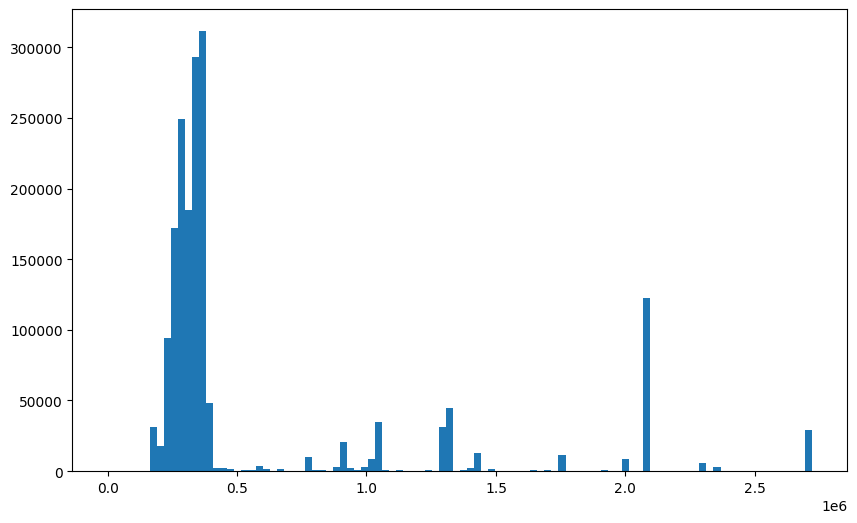

In [45]:
_, ax = plt.subplots(figsize=(10,6))
ax.hist(df2['resolution'], bins=100)
plt.show()

In [35]:
# Категории устройств в совершенных ЦД. (target=1)
df2_target = df2[df2.target==1]
df2_target['device_category'].value_counts()

device_category
mobile     38379
desktop    11513
tablet       422
Name: count, dtype: int64

In [39]:
# Целевое кодирование (у desktop больший вес)
encoder = TargetEncoder(smoothing=0.3)
df2['device_category'] = encoder.fit_transform(df1['device_category'], df1["target"])
df2['device_category'].value_counts()

device_category
0.027282    1406765
0.032151     358093
0.024655      17116
Name: count, dtype: int64

 df.loc[:, 'device'] = df['device_category'].apply(lambda x: 3.2 if x == 'desktop' else (2.8 if x == 'mobile' else 2.5))
Пробовал подставлять эти коэффициенты, точность модели даже немного ухудшается.

In [43]:
df2['device_category'].corr(df2['resolution'])

0.8587056159742334

In [44]:
# Кореляция высокая, добавление в модели resolution на roc_auk не влияет.

In [13]:
ohe.fit(df1[['geo_city']])

OneHotEncoder(handle_unknown='infrequent_if_exist', min_frequency=0.0001,
              sparse_output=False)

In [14]:
ohe_city = ohe.transform(df[['geo_city']])
ohe_city.shape

(1781974, 269)

Преобразование данных и обучение моделей будет в Pipline (PyCharm)